In [4]:
import MCEq.particlemanager as pman
import MCEq.data as data
import mceq_config as config
import matplotlib.pyplot as plt
import numpy as np

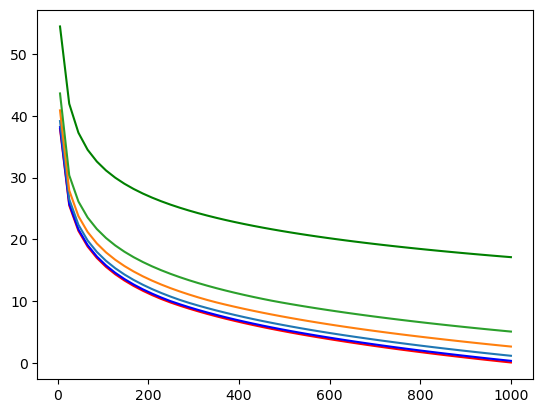

In [5]:
from MCEq.geometry.density_profiles import CorsikaAtmosphere
cka_obj = CorsikaAtmosphere('SouthPole', 'December')

xv = []
fxv = []
th_ar = [0.0, 15.0, 30.0, 45.0, 60.0, 90.0]
xv = np.linspace(5, 1000, num=50, endpoint=True)

for theta in th_ar:
    cka_obj.set_theta(theta)
    xv = np.linspace(5, 1000, num=50, endpoint=True)
    fx = np.array([cka_obj.X2h(x)/1e5 for x in xv])
    fxv.append(fx)

plt.plot(xv, fxv[0], color = 'r')
plt.plot(xv, fxv[1], color = 'b')
plt.plot(xv, fxv[2])
plt.plot(xv, fxv[3])
plt.plot(xv, fxv[4])
plt.plot(xv, fxv[5], color = 'g')

# set_theta(0.0)
# cka_obj.X2h(1)

In [6]:

config.adv_set["no_mixing"] = True


hdf5_back = data.HDF5Backend()
ics = data.InteractionCrossSections(hdf5_back)
# print(ff)
proton = pman.MCEqParticle(
    pdg_id=2212, helicity=0, cs_db=ics, energy_grid=hdf5_back.energy_grid
)
pion = pman.MCEqParticle(
    pdg_id=211, helicity=0, cs_db=ics, energy_grid=hdf5_back.energy_grid
)
# part._calculate_mixing_energy()
# inter = data.Interactions(data.HDF5Backend())
# part.set_cs(ics)


/tmp/ipykernel_3788382/4056511921.py:1: RuntimeWarning: divide by zero encountered in true_divide
  plt.semilogx(hdf5_back.energy_grid.c, 1/proton.inverse_interaction_length())


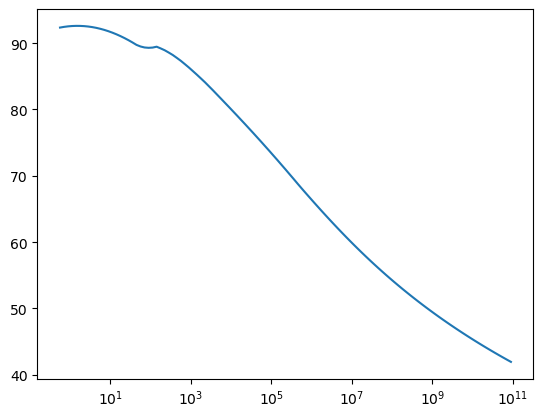

In [7]:
plt.semilogx(hdf5_back.energy_grid.c, 1/proton.inverse_interaction_length())
# plt.semilogx(hdf5_back.energy_grid.c, 1/pion.inverse_interaction_length())


In [8]:
import random
import numpy as np
import boost_histogram as bh


hist = bh.Histogram(bh.axis.Regular(bins=30, start=0, stop=100))

# z = random.random()
# * 1/proton.inverse_interaction_length()[80]

from MCEq.geometry.density_profiles import CorsikaAtmosphere
cka_obj = CorsikaAtmosphere('SouthPole', 'December')

cka_obj.set_theta(90.0)


# cka_obj.X2h(x)

def rand_length(i): 
    x = -np.log(1-random.random())/proton.inverse_interaction_length()[i]
    return cka_obj.X2h(x)/1e5
rand_length(10)

40.418809460153746

In [9]:


# def rand_length(): 
#     xsum = 0
#     for i in range(30):
#         # xsum += random.random()
#         xsum += -np.log(1-random.random())*(i + 1)**4
#     return xsum

Xavg = 1/proton.inverse_interaction_length()[30]
en = hdf5_back.energy_grid.c[30]
print(f"H = {cka_obj.X2h(Xavg)/1e5},X = {Xavg}, E = {en}")

# x = np.array([rand_length(30) for _ in range(100000)])

def length_dist(ind):
    res = np.array([rand_length(ind) for _ in range(100000)])
    return res
    
 
# hist.view() 
# hist.
# plt.hi
# hist.axes.centers
# plt.hist(hist.axes.centers, hist.view())
# plt.hist(x, 100, density=True, facecolor='g', alpha=0.75)

# bins, counts = np.histogram(length_dist(30), 100)
eind = [11, 31, 61, 101]
hists = []
ees = []
avh = []
for i in eind:
    hists.append(np.histogram(length_dist(i), 100))
    ees.append(hdf5_back.energy_grid.c[i])
    avh.append(cka_obj.X2h(1/proton.inverse_interaction_length()[i])/1e5)


H = 32.36846331463974,X = 89.30271109403324, E = 89.12509381337459


In [ ]:
ii = 9
Xavg = 1/proton.inverse_interaction_length()[ii]
en = hdf5_back.energy_grid.c[ii]
print(f"H = {cka_obj.X2h(Xavg)/1e5},X = {Xavg}, E = {en}")

H = 32.12900680775324,X = 92.46053703303416, E = 0.707945784384138


In [ ]:
import math

def sci_notation(num, decimal_digits=1, precision=None, exponent=None):
    """
    Returns a string representation of the scientific
    notation of the given number formatted for use with
    LaTeX or Mathtext, with specified number of significant
    decimal digits and precision (number of decimal digits
    to show). The exponent to be used can also be specified
    explicitly.
    """
    if exponent is None:
        exponent = int(math.floor(math.log10(abs(num))))
    coeff = round(num / float(10**exponent), decimal_digits)
    if precision is None:
        precision = decimal_digits

    return r"${0:.{2}f}\cdot10^{{{1:d}}}$".format(coeff, exponent, precision)

(0.0, 80.0)

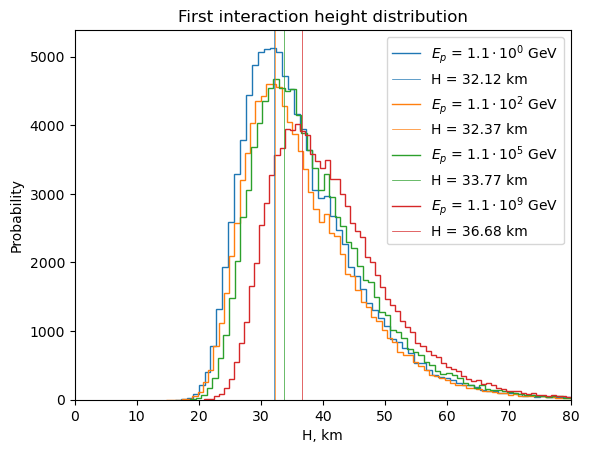

In [ ]:

# for i in range(len(eind)):
#     plt.stairs(*hists[i], label=f"E = {ees[i]:.1e} GeV")
ep = r"$E_p$" 
for i in range(len(eind)):
    pp = plt.stairs(*hists[i], label=f"{ep} = {sci_notation(ees[i])} GeV")
    # pp.get_edgecolor
    plt.axvline(x = avh[i],linewidth = 0.5, color = pp.get_edgecolor(), label = f'H = {avh[i]:0.2f} km') 
# plt.axvline(x = 40, color = 'b', label = 'axvline - full height')    
plt.legend()
plt.xlabel('H, km')
plt.ylabel('Probability')
plt.title('First interaction height distribution')
plt.xlim(0, 80)
# plt.ylim(0, 0.03)
# plt.grid(True)


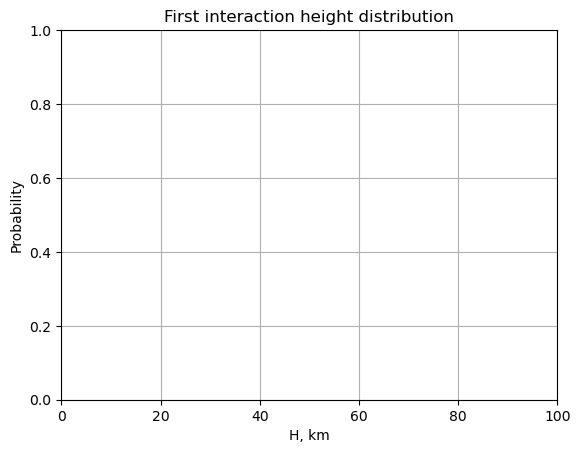

In [ ]:
plt.xlabel('H, km')
plt.ylabel('Probability')
plt.title('First interaction height distribution')
plt.xlim(0, 100)
# plt.ylim(0, 0.03)
plt.grid(True)
# fig()
# mesh = ax.pcolormesh(*hist.axes.edges.T, density.T)
# fig.colorbar(mesh)
# plt.savefig("simple_density.png")

# plt.semilogy(np.linspace(0,len(hdf5_back.energy_grid.c)),hdf5_back.energy_grid.c)

In [ ]:
import impy
from impy.constants import TeV



ekin = impy.kinematics.CenterOfMass(10, "proton", "proton")
gen = impy.models.Sibyll23d(ekin)



 |                                                  |
 |                 S I B Y L L  2.3d                |
 |                                                  |
 |         HADRONIC INTERACTION MONTE CARLO         |
 |                        BY                        |
 |            Eun-Joo AHN, Felix RIEHN              |
 |      R. ENGEL, A. FEDYNITCH, R.S. FLETCHER,      |
 |       T.K. GAISSER, P. LIPARI, T. STANEV         |
 |                                                  |
 | Publication to be cited when using this program: |
 | Eun-Joo AHN et al., Phys.Rev. D80 (2009) 094003  |
 | F. RIEHN et al., hep-ph: 1912.03300              |
 | last modifications: F. Riehn (05/20/2020)        |

359.03268389323034
 SIG_AIR_INI: initializing target: (i,A)           1           0 air..
 SIG_AIR_INI: initializing target: (i,A)           2          14 nit..
 SIG_AIR_INI: initializing target: (i,A)           3          16 oxy..


In [1]:

import impy
import random
import numpy as np
import dataclasses
import math


@dataclasses.dataclass
class ShowerParticle:
    id : int
    parent_id : int
    interacted : bool
    pid : int
    energy : float
    xlength : float
    
    

class ShowerGenerator():
    
    
    Emin_threshold = 1e4
    mbarn_in_cm2 = 1e-27
    proton_mass_g = 1.672621e-24
    mass_barn = proton_mass_g/mbarn_in_cm2
    id_in_shower = 0
    
    event_generator = None
    
    def __init__(self):
        print(f"Evgen = {ShowerGenerator.event_generator}")
        if self.event_generator is None:
            ekin = impy.kinematics.FixedTarget(10, "proton", (14, 7))
            ShowerGenerator.event_generator = impy.models.Sibyll23d(ekin)
            self._set_average_A(14)
            self.event_generator_is_set = True
        valid_sib_ids = [7,8,9,10,11,12,13,14,-13,-14]
        valid_sib_ids.extend([34,35,36,37,38,39])
        valid_sib_ids.extend([59,60,71,72,74,75])
        valid_sib_ids.extend([87,88,89,99,27])
        self.valid_sib_ids = set(valid_sib_ids)     
        
    def _set_average_A(self, A):
        self.average_A = A
        self.factor_sigma = A*self.mass_barn
        
        
    def _sigma_wrapper(self):
        k = ShowerGenerator.event_generator.event_kinematics
        
        sib_id = ShowerGenerator.event_generator._lib.isib_pdg2pid(k.p1pdg)     
        if sib_id not in self.valid_sib_ids:
            raise Exception("Not a valid sib_id")
        
        sigma_hair = ShowerGenerator.event_generator._lib.sib_sigma_hair
        
        
        kabs = abs(k.p1pdg)
        if 1000 < kabs < 10000:
            sigproj = 1
        elif kabs % 1000 < 300:
            sigproj = 2
        else:
            sigproj = 3
            
        # print(f"sigproj = {sigproj}, {k.ecm},"
        #       f" hair = {sigma_hair(sigproj, k.ecm)},"
        #       f" shair = {ShowerGenerator.event_generator._lib.sib_sigma_hair}") 
        sigma = sigma_hair(sigproj, k.ecm)
        if isinstance(sigma, tuple):
            return sigma[0]
        return sigma
    
    def get_average_xlength(self, pid, energy):
        ShowerGenerator.event_generator.event_kinematics = impy.kinematics.FixedTarget(energy, int(pid), (14, 7))
        sigma = 1 / self._sigma_wrapper()
        return self.factor_sigma * sigma
    
    def get_xlength(self, pid, energy):
        xlen = self.get_average_xlength(pid, energy)
        return -np.log(1-random.random())*xlen
    
    def get_generation(self, shower_particle):
        
        # Means that we used the particle
        # Do we need this ?
        shower_particle.interacted = True
        
        if shower_particle.energy < self.Emin_threshold:
            return None
        
        try:
            xlength = self.get_xlength(shower_particle.pid, shower_particle.energy)
        except Exception:
            return None
        
        if not xlength or math.isnan(xlength):
            return None
            
        xlength += shower_particle.xlength
        print(f"Shower pid {shower_particle.pid}")
        event = next(self.event_generator(1)).final_state()
        
        
        generation = []
        
        for i in range(len(event)):
            ev = event[i]
            # The id_in_shower for initial particle is 0
            # So the last id_in_shower is also number of generated particles so far
            self.id_in_shower += 1
            sp = ShowerParticle(self.id_in_shower
                                , shower_particle.id
                                , False
                                , ev.pid
                                , ev.en
                                , xlength)
            generation.append(sp)
        
        return generation

    
shower_generator = ShowerGenerator()  

Evgen = None
 |                                                  |
 |                 S I B Y L L  2.3d                |
 |                                                  |
 |         HADRONIC INTERACTION MONTE CARLO         |
 |                        BY                        |
 |            Eun-Joo AHN, Felix RIEHN              |
 |      R. ENGEL, A. FEDYNITCH, R.S. FLETCHER,      |
 |       T.K. GAISSER, P. LIPARI, T. STANEV         |
 |                                                  |
 | Publication to be cited when using this program: |
 | Eun-Joo AHN et al., Phys.Rev. D80 (2009) 094003  |
 | F. RIEHN et al., hep-ph: 1912.03300              |
 | last modifications: F. Riehn (05/20/2020)        |

 SIG_AIR_INI: initializing target: (i,A)           1           0 air..
 SIG_AIR_INI: initializing target: (i,A)           2          14 nit..
 SIG_AIR_INI: initializing target: (i,A)           3          16 oxy..


In [2]:

initial_particle = ShowerParticle(0, 0, False, 2212, 1e9, 0)

stack_of_ps = []
stack_of_ps.append(initial_particle)

In [ ]:
print(shower_generator.get_generation(initial_particle))
print(shower_generator._sigma_wrapper())

In [3]:

niter = 0
final_stack = []

while stack_of_ps:
    niter += 1
    cpart = stack_of_ps.pop()
    
    current_generation = shower_generator.get_generation(cpart)
    if current_generation:
        print(f"Iter = {niter}, part_num = {len(current_generation)}")
        stack_of_ps.extend(current_generation)
    else:
        final_stack.append(cpart)       
    


Shower pid 2212
Iter = 1, part_num = 731
Shower pid -211
Iter = 5, part_num = 45
Shower pid 3112
Iter = 45, part_num = 3
Shower pid 3212
Iter = 47, part_num = 37
Shower pid 211
Iter = 91, part_num = 39
Shower pid 2212
Iter = 111, part_num = 30
Shower pid 211
Iter = 121, part_num = 3
Shower pid -2212
Iter = 163, part_num = 46
Shower pid -211
Iter = 211, part_num = 58
Shower pid 130
Iter = 242, part_num = 44
Shower pid 310
Iter = 292, part_num = 32
Shower pid -211
Iter = 337, part_num = 50
Shower pid 211
Iter = 383, part_num = 50
Shower pid -211
Iter = 434, part_num = 165
Shower pid 130
Iter = 486, part_num = 124
Shower pid -211
Iter = 613, part_num = 118
Shower pid 211
Iter = 816, part_num = 43
Shower pid 130
Iter = 846, part_num = 38
Shower pid 321
Iter = 865, part_num = 25
Shower pid 321
Iter = 890, part_num = 25
Shower pid -211
Iter = 948, part_num = 41
Shower pid 211
Iter = 1014, part_num = 51
Shower pid 211
Iter = 1046, part_num = 65
Shower pid -211
Iter = 1131, part_num = 114
Show

In [4]:
en_data = []

for i in range(len(final_stack)):
    en_data.append(final_stack[i].energy)

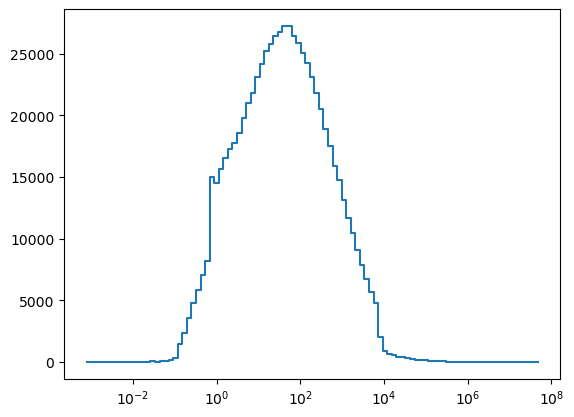

In [28]:
import matplotlib.pyplot as plt
import numpy as np
gr, cnt = np.histogram(np.log10(en_data), 100)
plt.semilogx()
plt.step(10**cnt[:-1], gr)
# plt.loglog(basex = 10)
# plt.stairs(gr,cnt)
# print(10**cnt)


In [6]:
etot = 0
for ee in en_data:
    etot += ee
    
print(f"Etot = {abs(etot - 1e9)/1e9}")    

Etot = 1.762516799068451e-05


In [7]:
xm_data = []

for i in range(len(final_stack)):
    xm_data.append(final_stack[i].xlength)

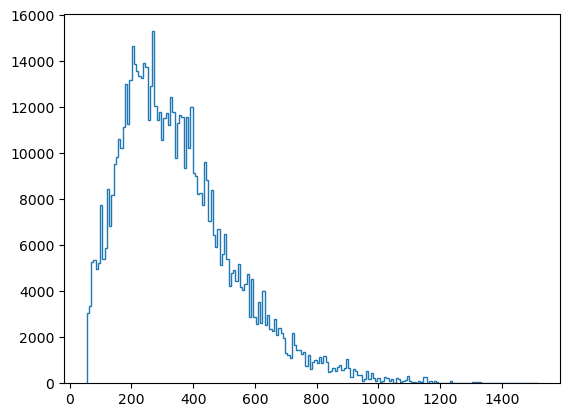

In [13]:
plt.stairs(*np.histogram(xm_data, 200))

In [ ]:
for spart in current_stack.values():
    print(spart.id)
    current_generation = shower_generator.get_generation(spart)
    if current_generation:
        stack_new.update(current_generation)
    stack_old.update({spart.id : spart})
    